In [12]:
#installment of packages

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [2]:
df = pd.read_csv("Credit Card_Clustering.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.drop("CUST_ID",axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [6]:
df.shape

(8950, 17)

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [9]:
#Counting the no. of unique values in a column

df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

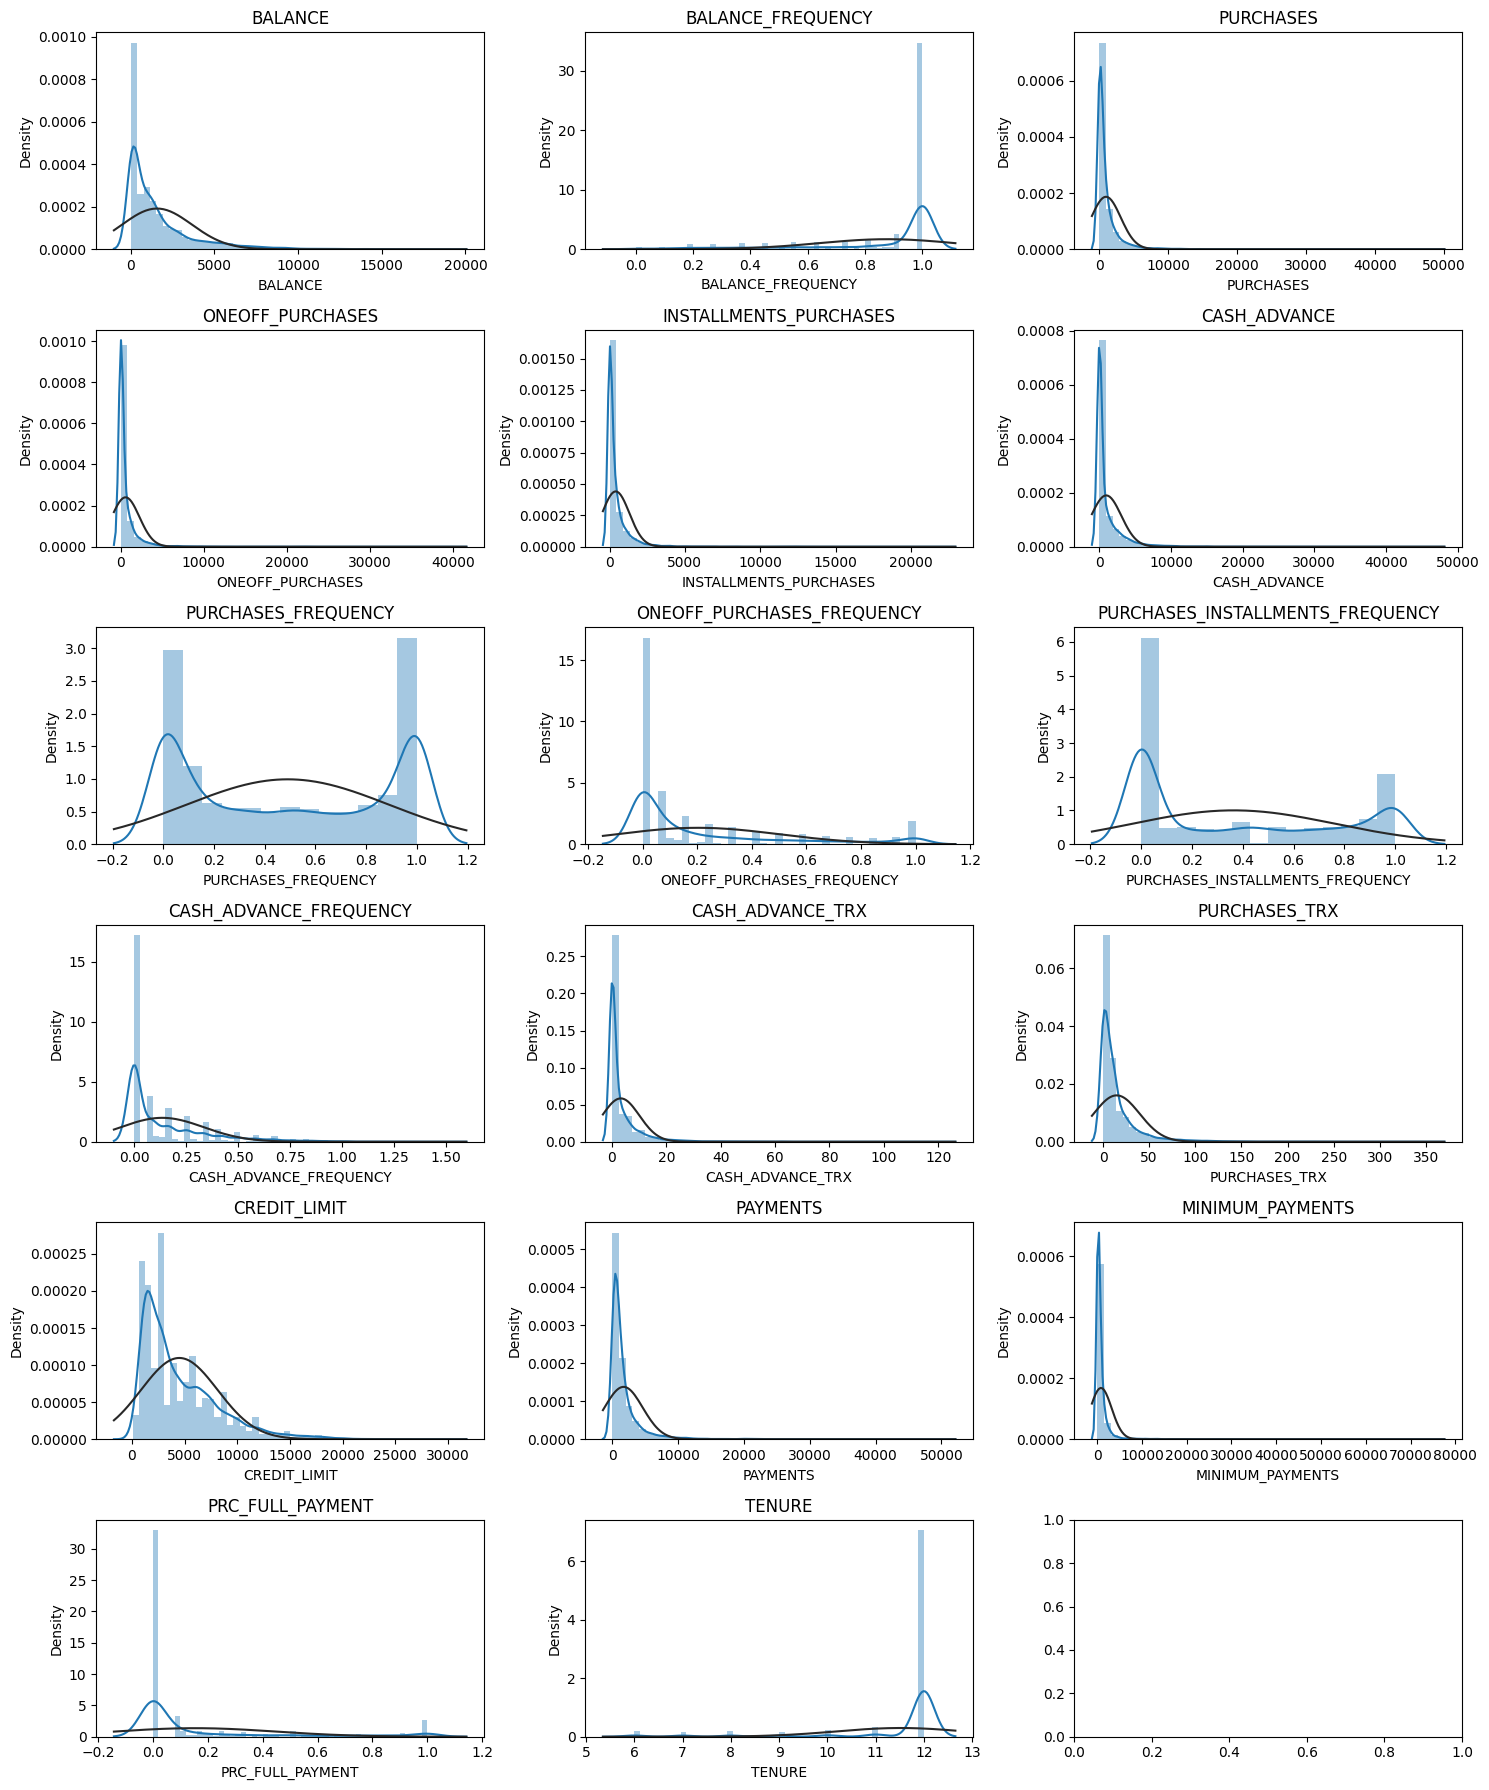

In [13]:
#A quick check on vriables

graph_by_variables = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(15, 18))
ax = ax.flatten()

for i in range(len(graph_by_variables)):
    sns.distplot(df[graph_by_variables[i]].dropna(), fit=norm, ax=ax[i])
    ax[i].set_title(graph_by_variables[i])

plt.tight_layout()
plt.show()


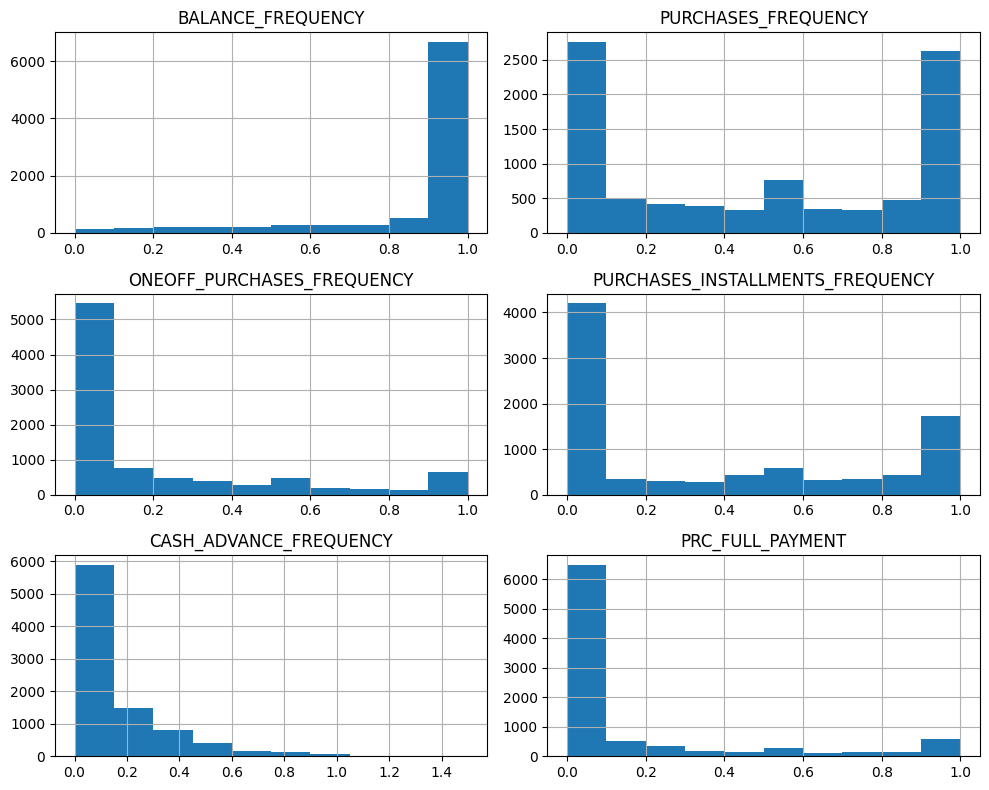

In [14]:
#Frequency variables in charts

df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].hist(figsize=(10,8))
plt.tight_layout()

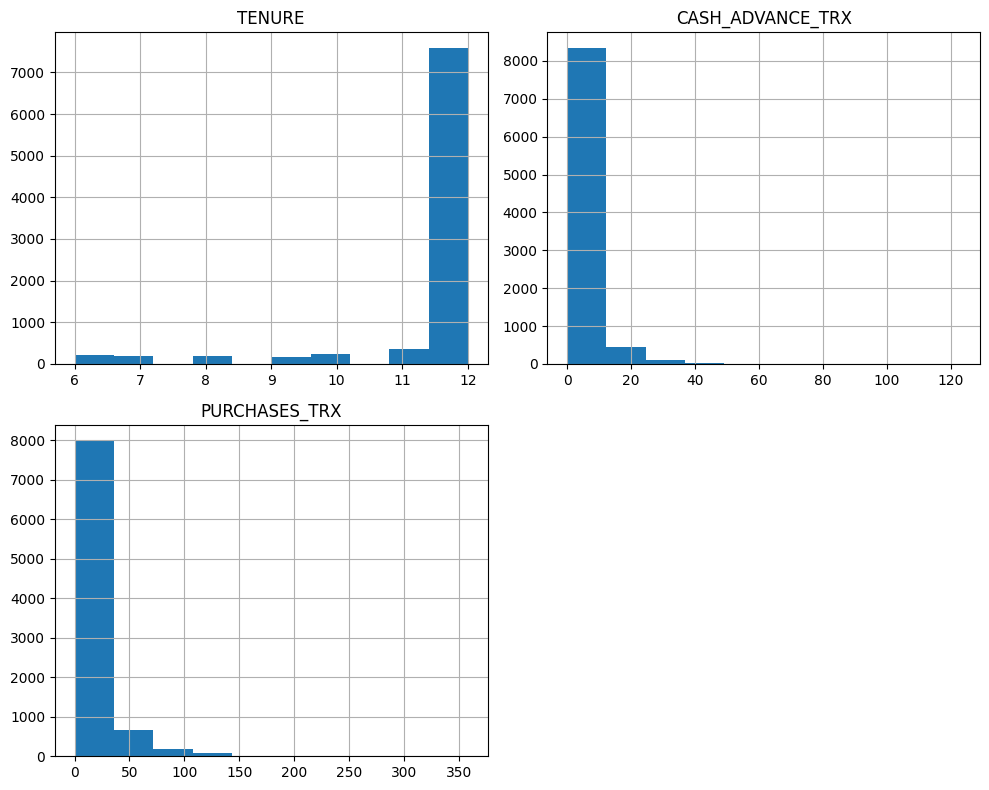

In [15]:
#int. values in histogram

df[['TENURE','CASH_ADVANCE_TRX', 'PURCHASES_TRX']].hist(figsize=(10,8))
plt.tight_layout()

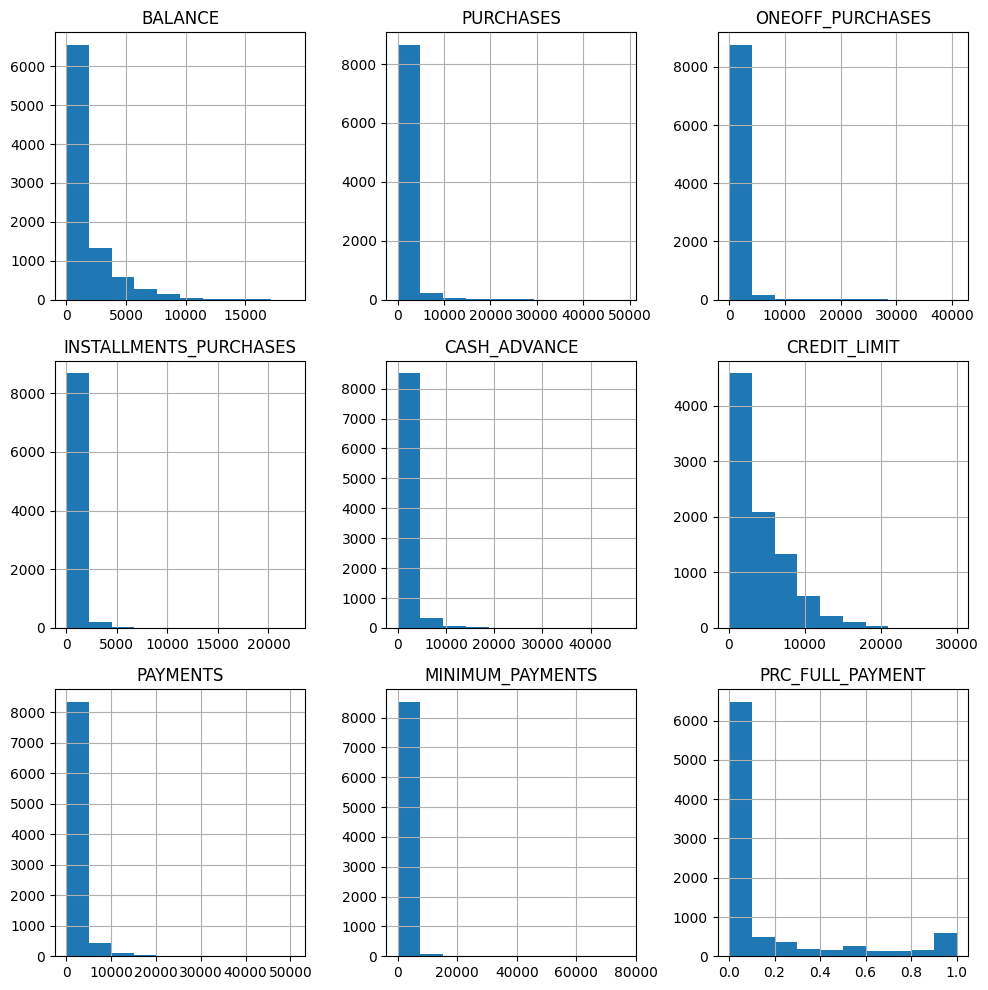

In [16]:
df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].hist(figsize=(10,10))

plt.tight_layout()

Text(0, 0.5, 'BALANCE')

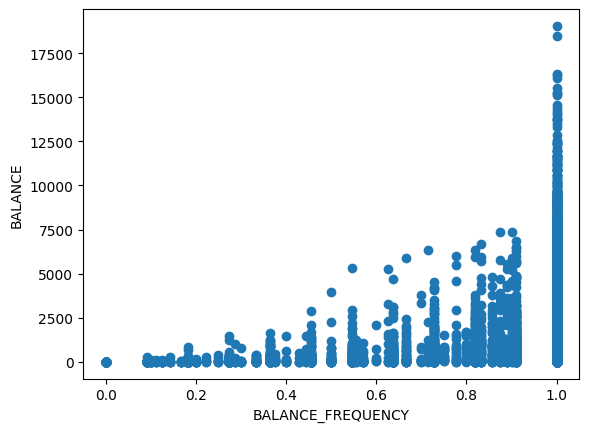

In [17]:
plt.scatter(df['BALANCE_FREQUENCY'], df['BALANCE'])
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('BALANCE')

<Axes: title={'center': 'Tenure'}, ylabel='Density'>

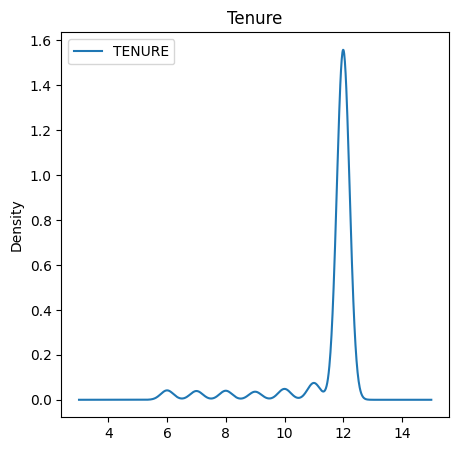

In [18]:
df[['TENURE']].plot.kde(figsize=(5,5),title='Tenure')


Text(0.5, 1.0, 'Correlation Matrix')

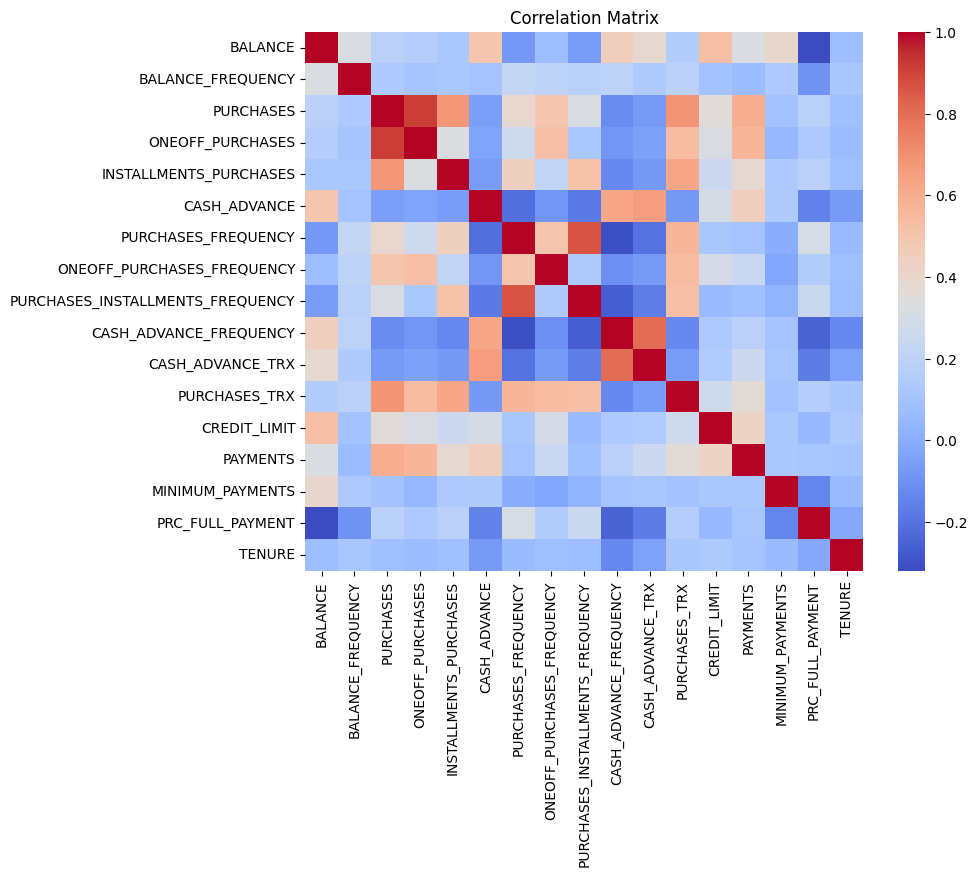

In [19]:
#Creating a correlation matrix of the datset "df"
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')

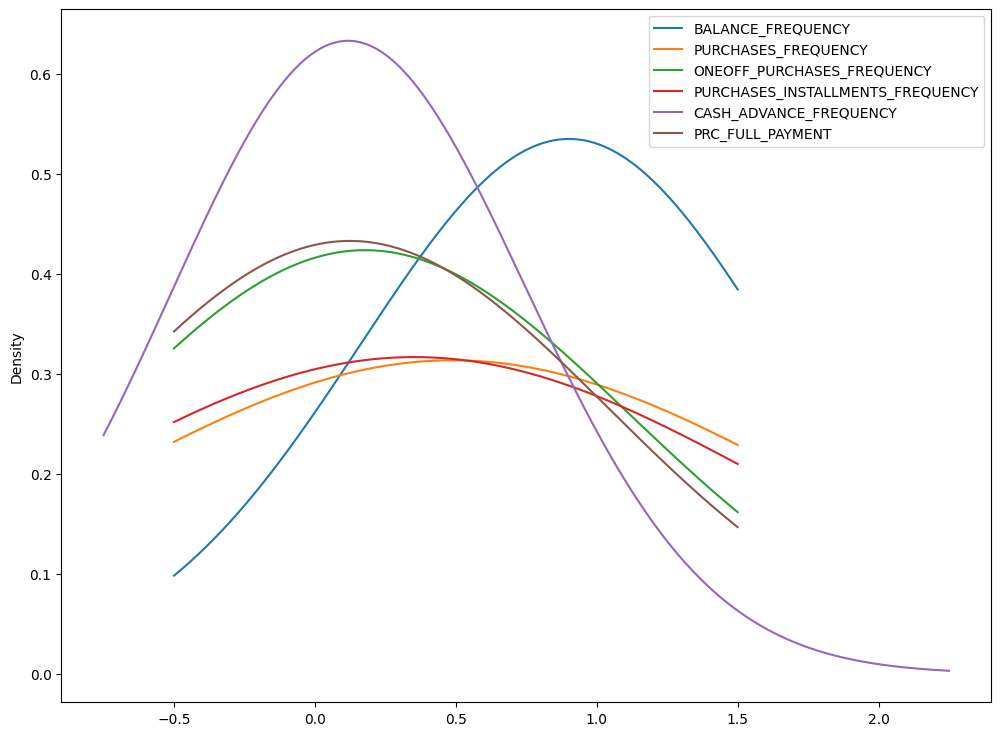

In [20]:
#creating a KDE (Kernel Density Estimation) plot for a subset of columns in the dataset df.

ax = df[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
         'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']].plot.kde(figsize=(12,9), bw_method=3) #,ind=[0, 2, 3,4]

# Overview about Outliers

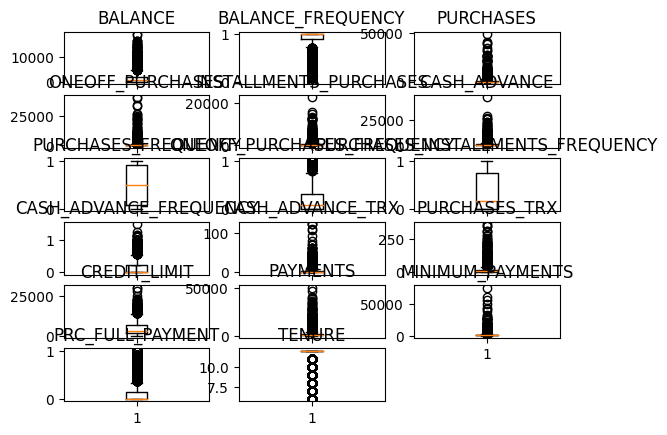

In [21]:
# plt.figure(figsize=(20,35))

for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(df[graph_by_variables[i]].dropna())
    plt.title(graph_by_variables[i])

# Checking for missing or null values

In [22]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [24]:
#Filling in the values of the row data

df.MINIMUM_PAYMENTS  = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean()) 


In [25]:
df.CREDIT_LIMIT      = df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean()) 


In [26]:
df.isnull().sum().sort_values(ascending=False).head()


BALANCE                   0
CASH_ADVANCE_FREQUENCY    0
PRC_FULL_PAYMENT          0
MINIMUM_PAYMENTS          0
PAYMENTS                  0
dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
dfstd = scaler.fit_transform(df)


In [28]:
kmeans8 = KMeans(n_clusters=8, random_state=40).fit(dfstd)
df['cluster'] = kmeans8.labels_

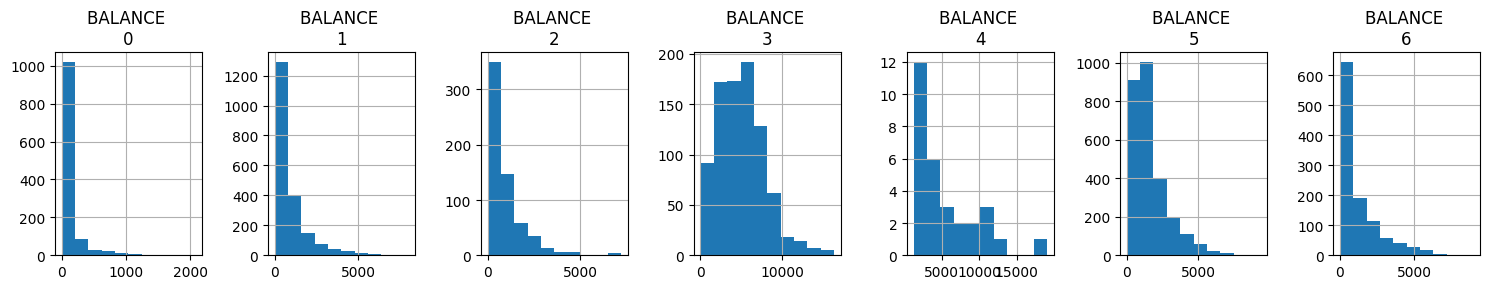

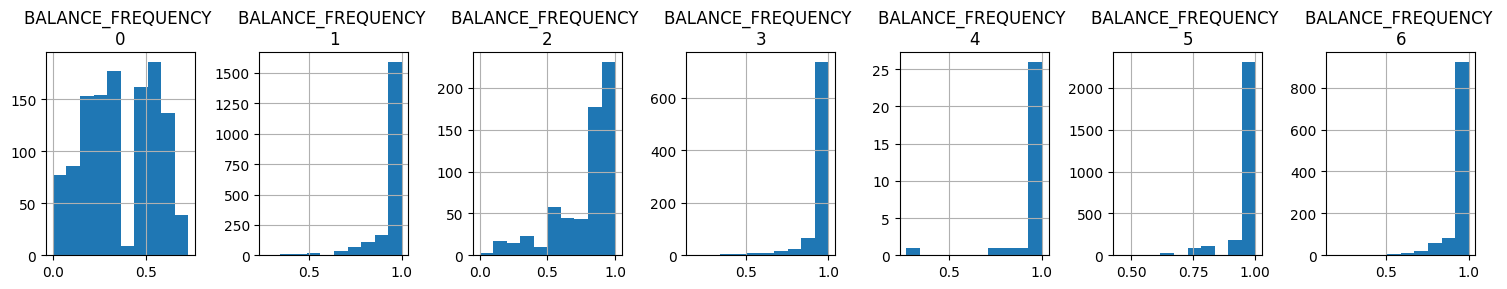

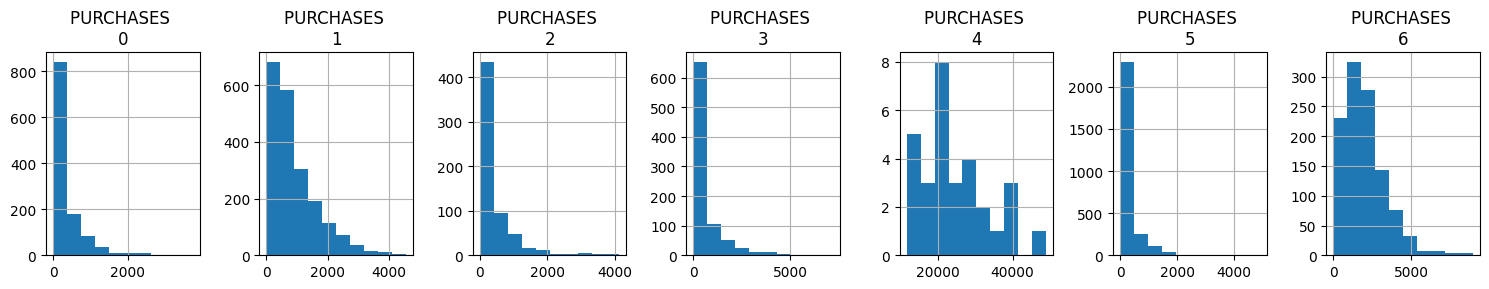

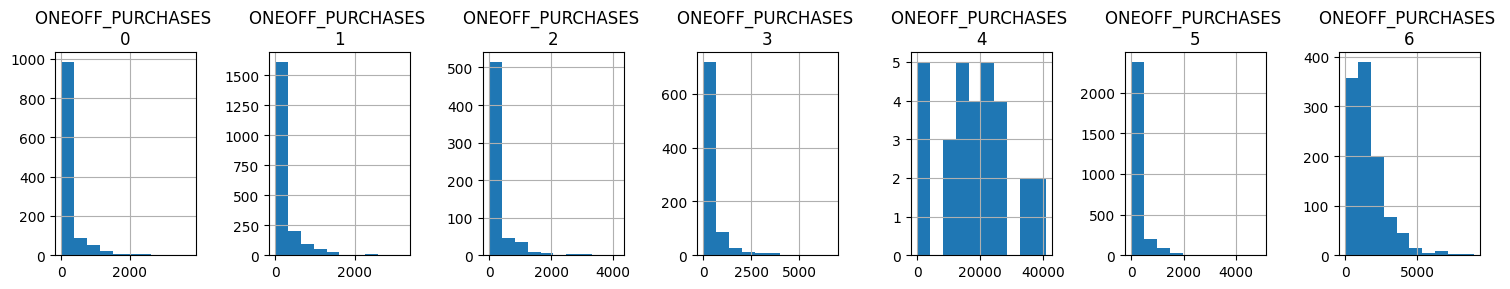

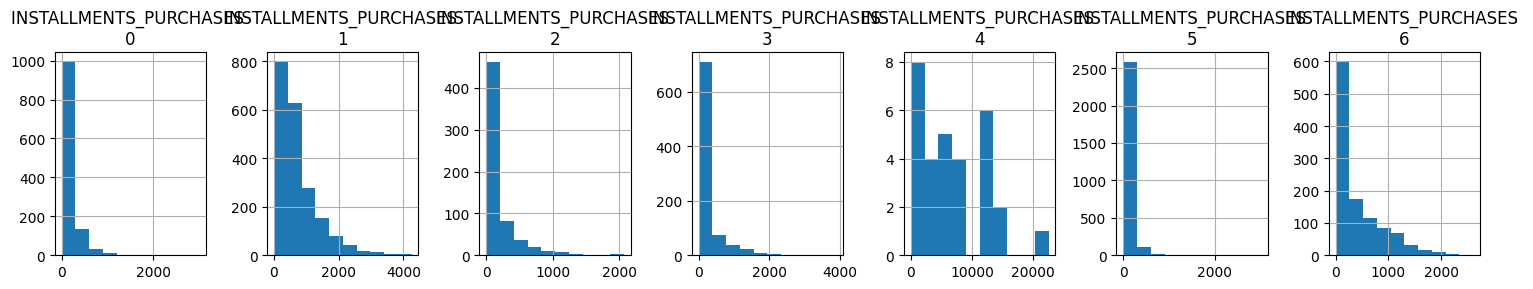

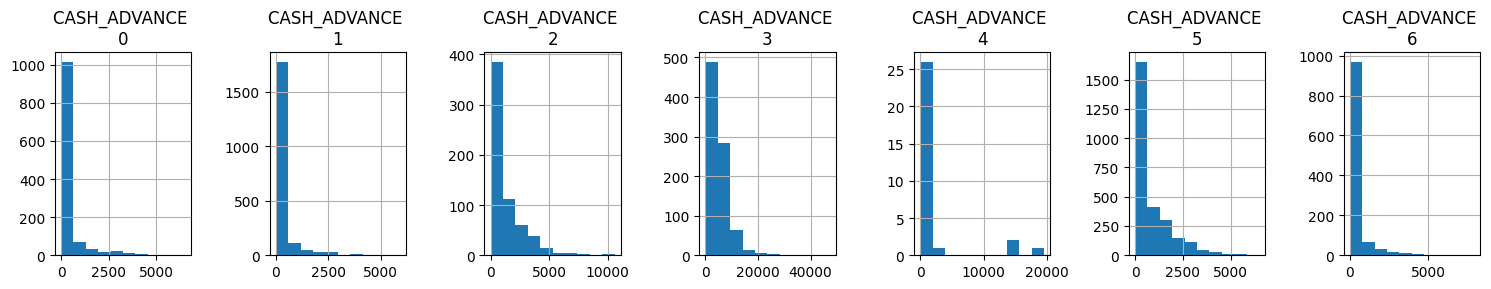

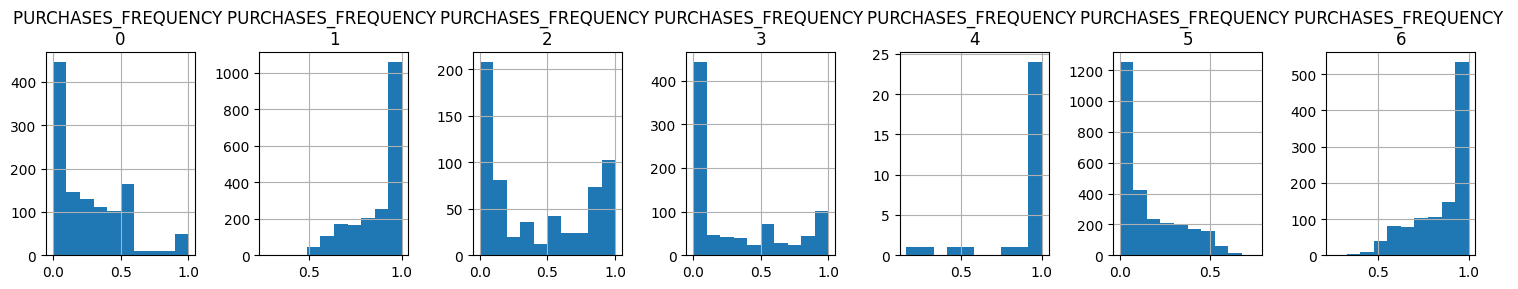

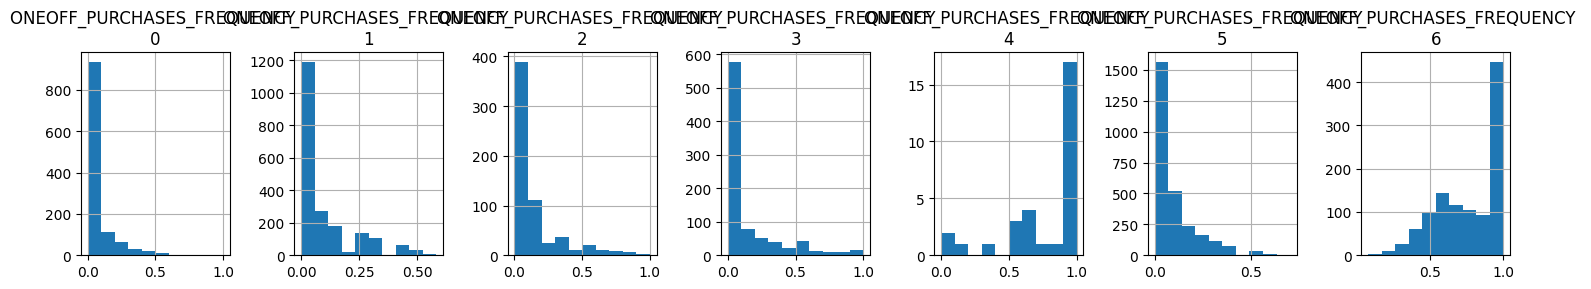

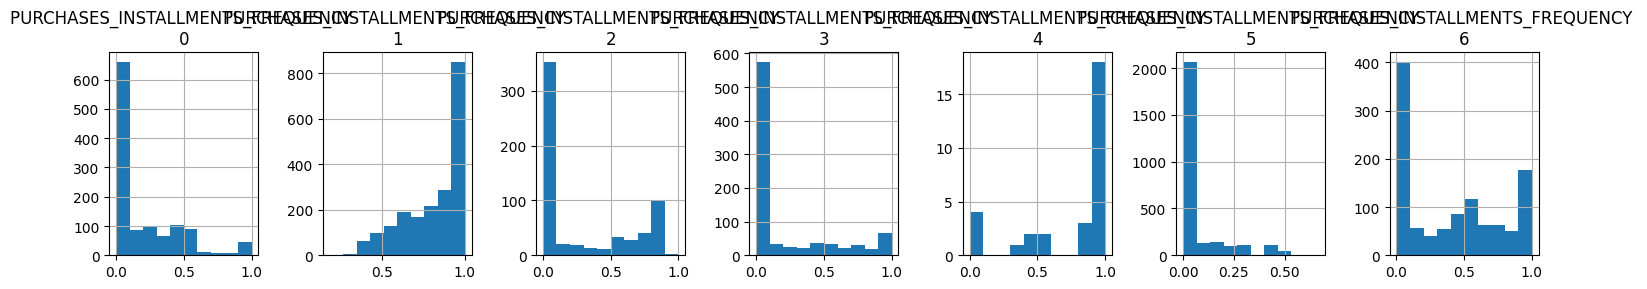

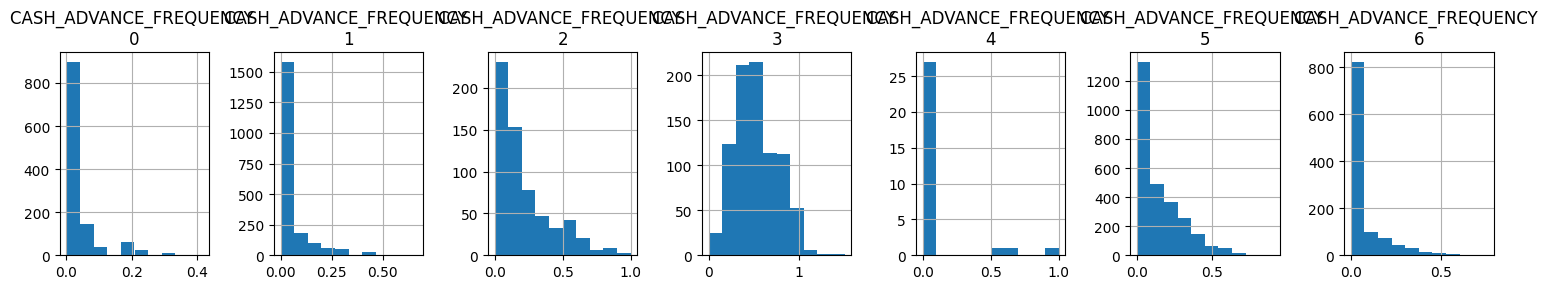

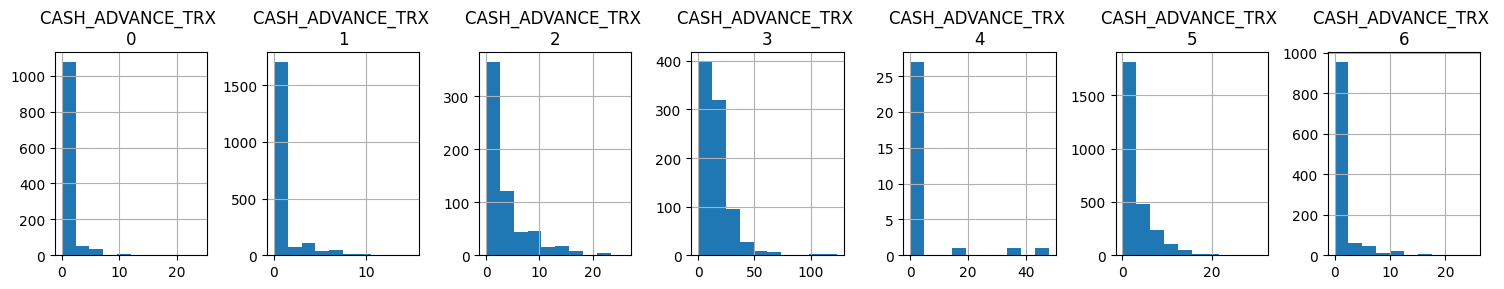

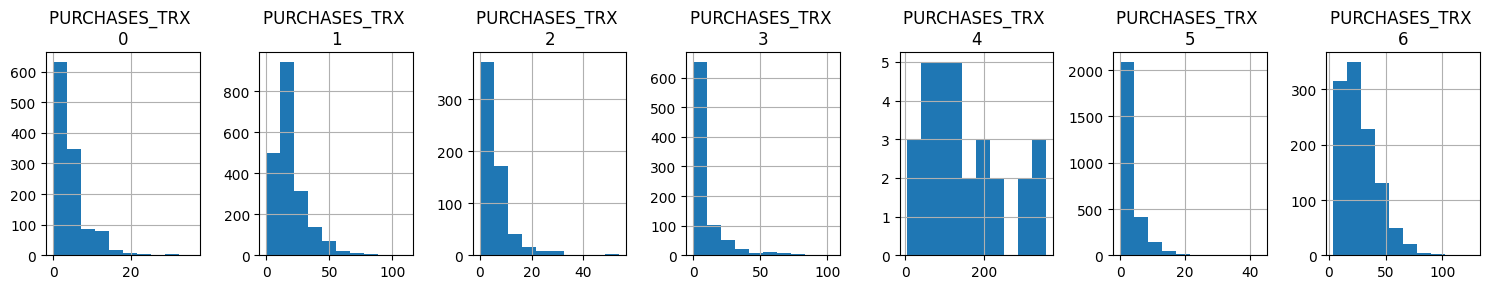

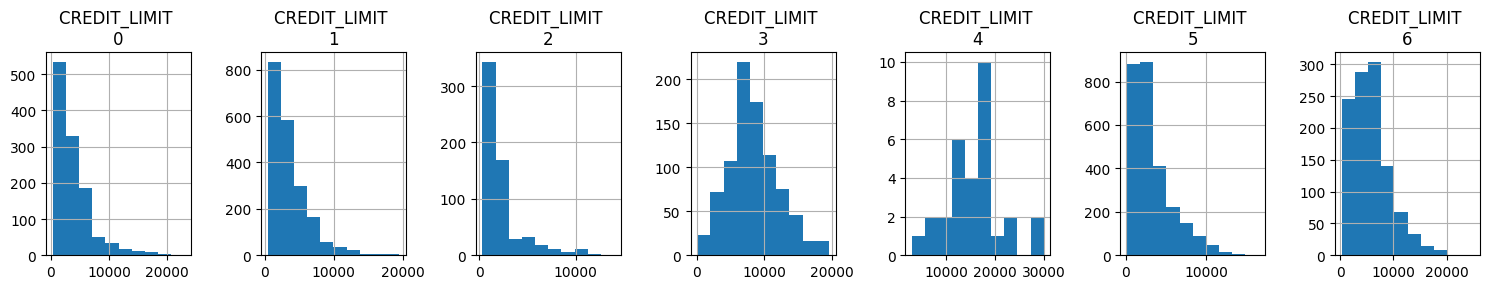

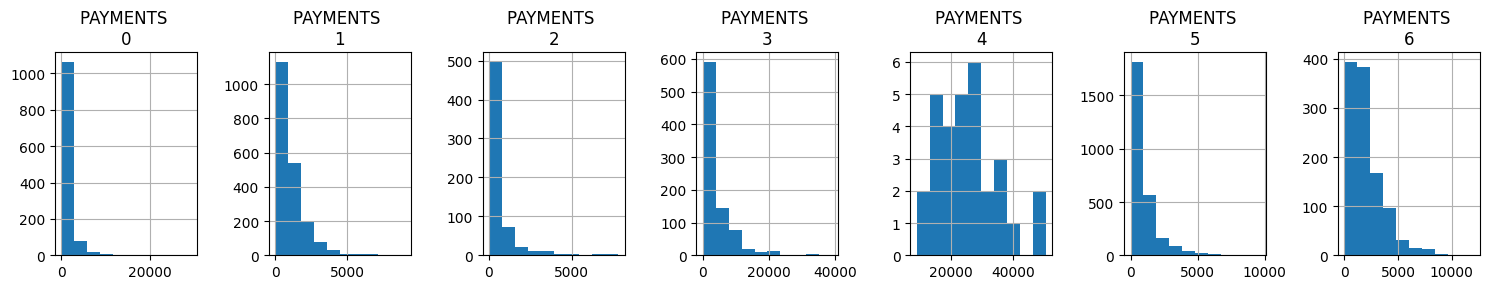

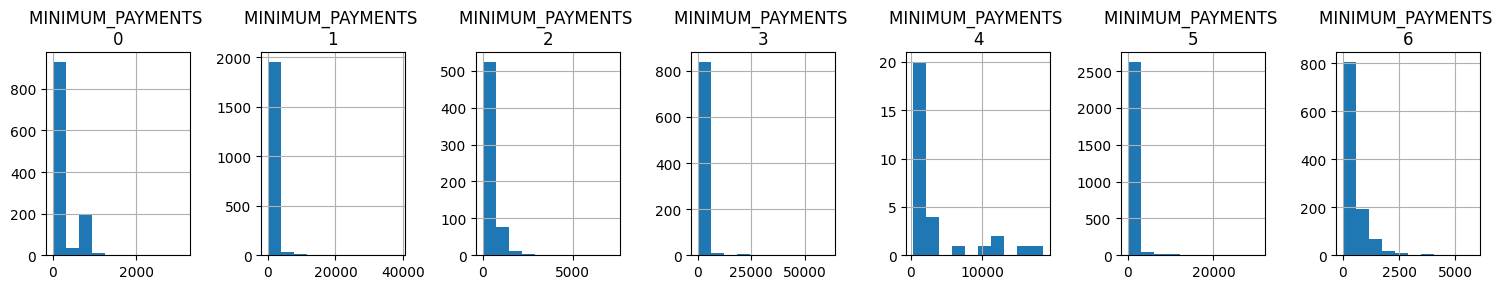

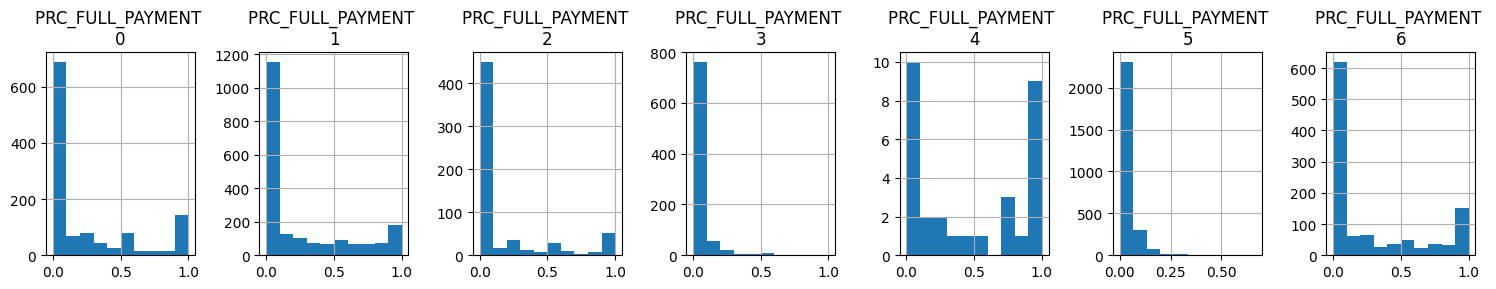

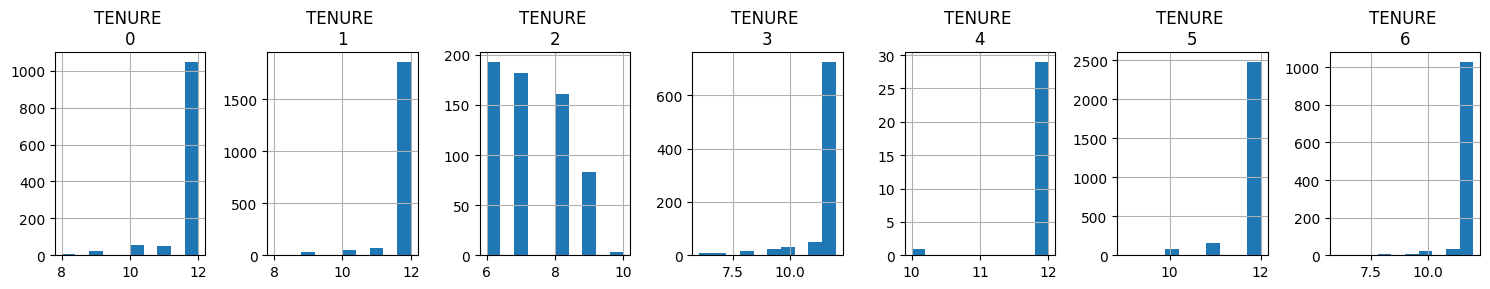

In [32]:
col_list= col_list= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,7):
        plt.subplot(1,7,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

In [33]:
df.TENURE.unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

Text(0, 0.5, 'PAYMENTS')

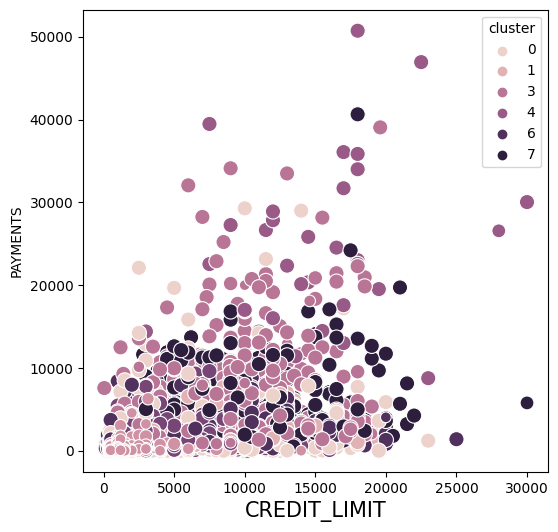

In [34]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='CREDIT_LIMIT', y='PAYMENTS', hue='cluster',data=df, s = df.TENURE*10);
plt.xlabel('CREDIT_LIMIT',size=15)
#plt.xlim([0,40000])
plt.ylabel('PAYMENTS', size =10)

<Figure size 2500x2500 with 0 Axes>

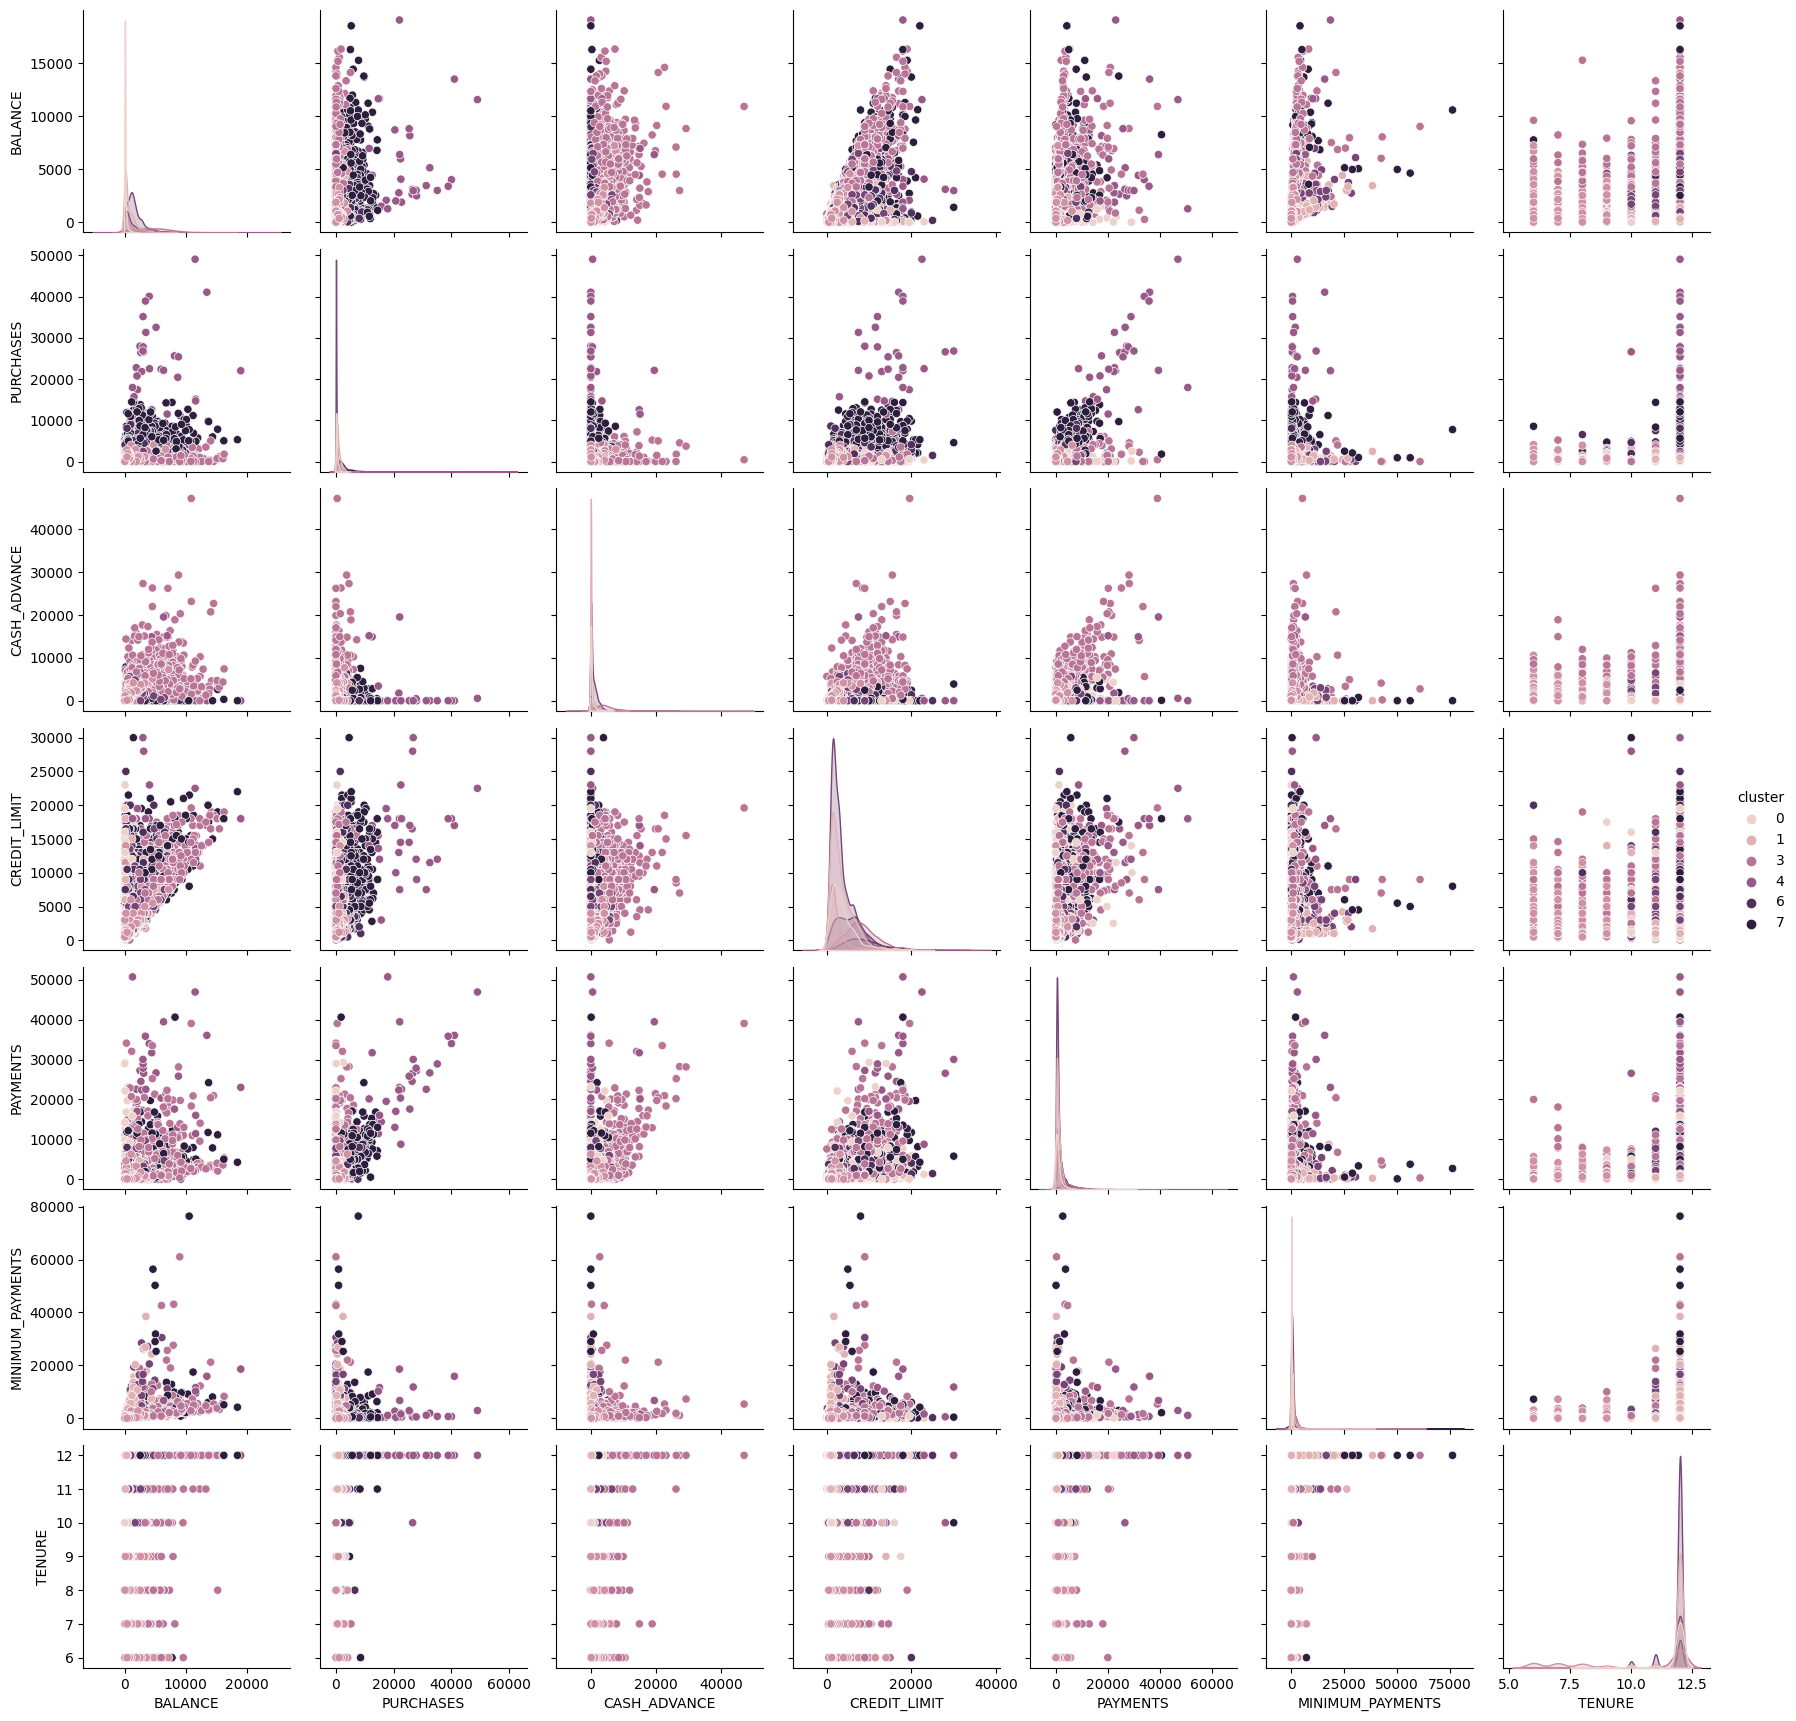

In [35]:
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( df[best_columns], hue="cluster")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


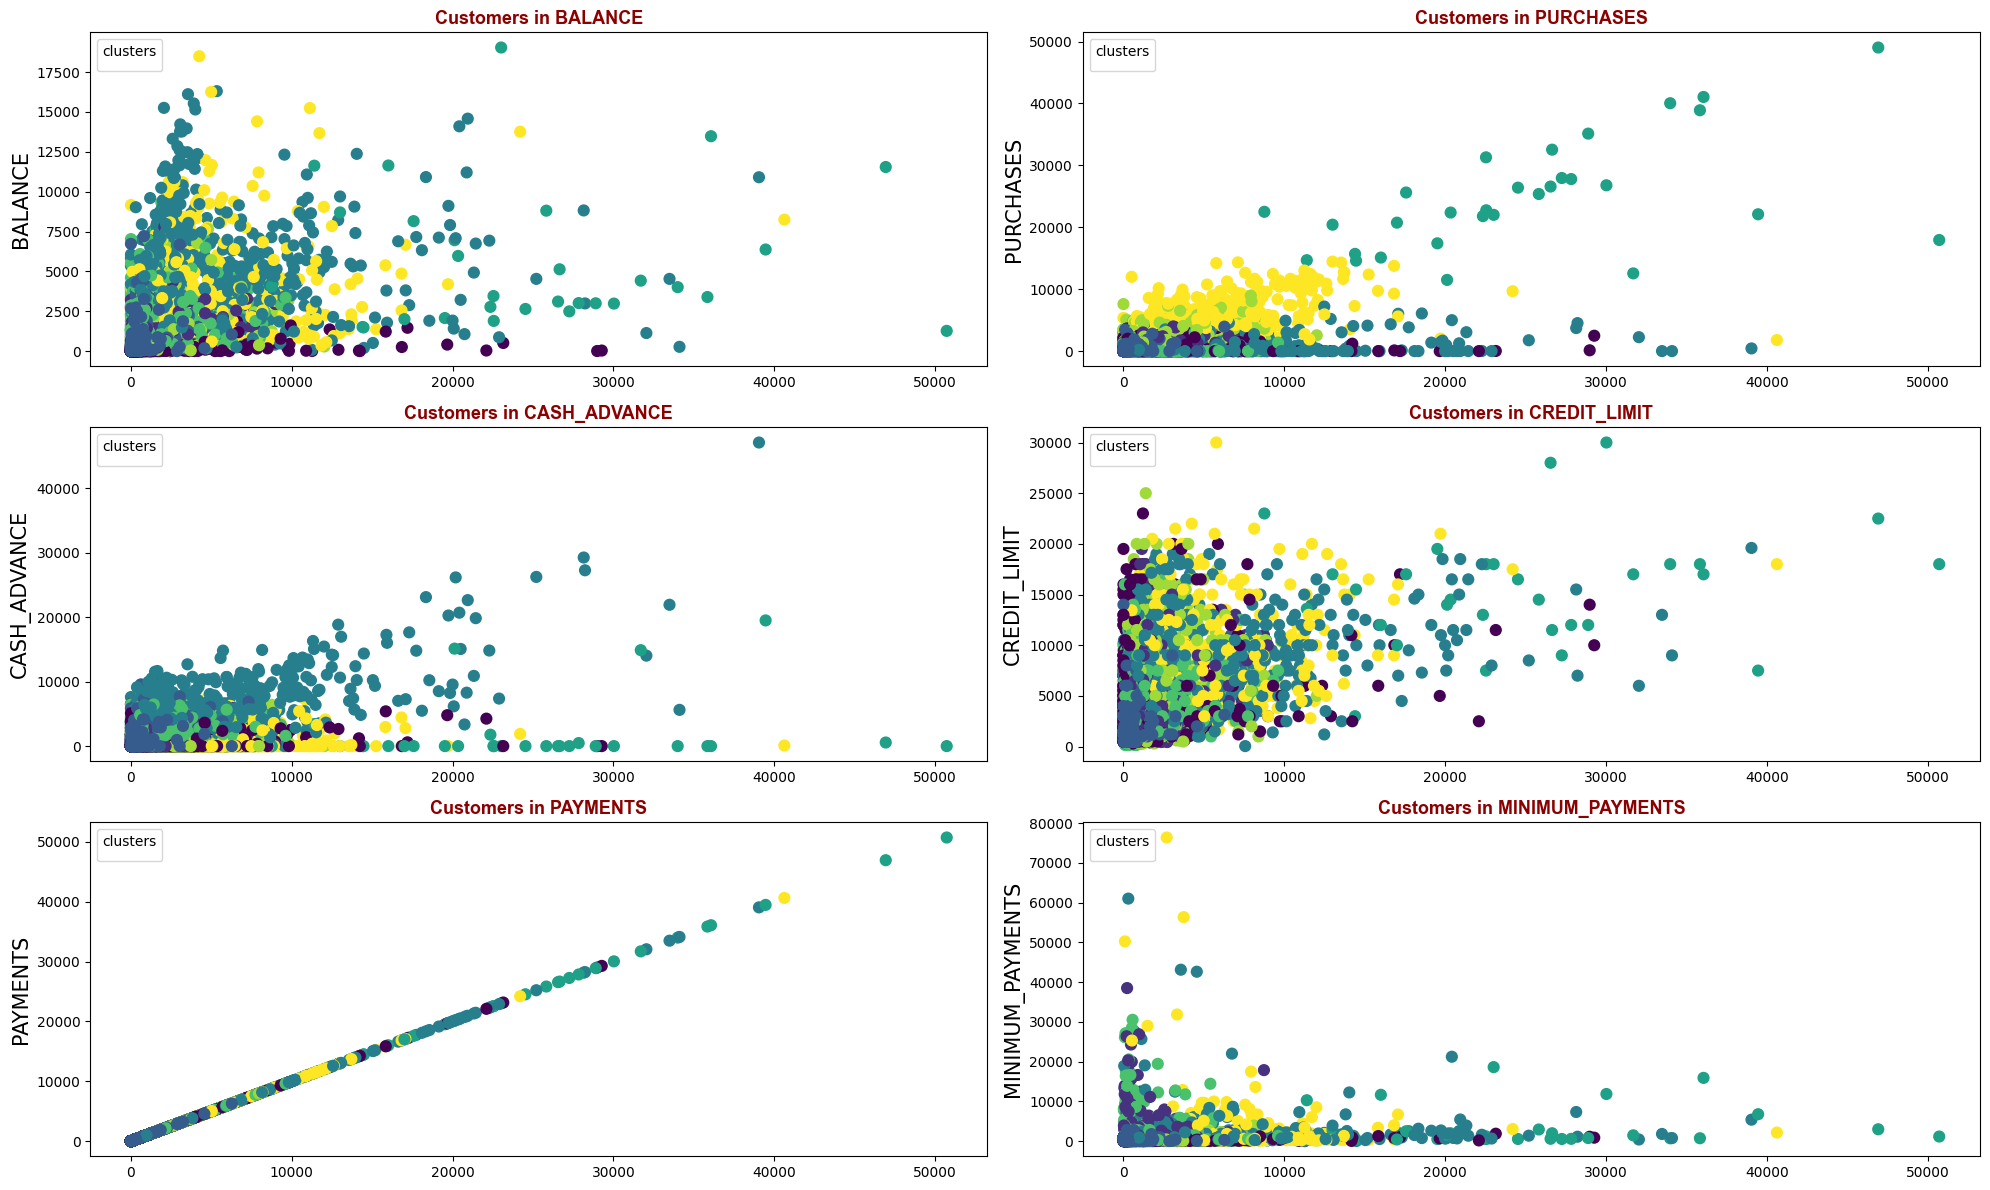

In [36]:
fig, axes = plt.subplots(3,2,figsize=(20,12))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 14 }

for i in range(0,6):
    
    plt.subplot(3, 2, i+1)
    plt.scatter(df['PAYMENTS'], df[best_columns[i]], c= df['cluster'], s=60)
    legend = plt.legend(loc="upper left", title="clusters")
    plt.title('Customers in '+ str(best_columns[i]), fontdict=title_font, fontsize=13)
    #plt.xlabel('customer_behaviours',size=15)
    plt.ylabel(str(best_columns[i]),size=15)
    

plt.tight_layout()
plt.show()